In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

import networkx as nx
from statsmodels.tsa.stattools import adfuller

# read the data
# data = pd.read_csv('closing_prices_cleaned.csv')
resFit1 = pd.read_csv('ResidualBMW_BBVA_ENEL_MGarchFit1.csv', index_col=0)
sigmaFit1 = pd.read_csv('SigmaBMW_BBVA_ENEL_MGarchFit1.csv', index_col=0)

resFitADCC = pd.read_csv('ResidualBMW_BBVA_ENEL_MGarchFitADCC.csv', index_col=0)
sigmaFitADCC = pd.read_csv('SigmaBMW_BBVA_ENEL_MGarchFitADCC.csv', index_col=0)


resFit1.head()

,BMW,BBVA,ENEL
1,-0.000757,0.000043,-0.000810
2,0.229989,-0.000997,0.004824
3,0.233449,0.002925,0.001049
4,-0.125166,0.000220,0.005228
5,-0.130544,-0.007983,0.001137


In [4]:
normRes = resFit1['ENEL'] / sigmaFit1['ENEL']

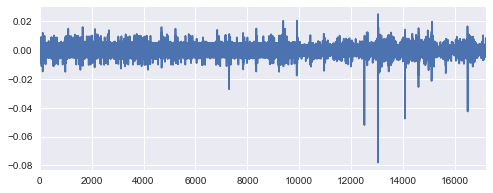

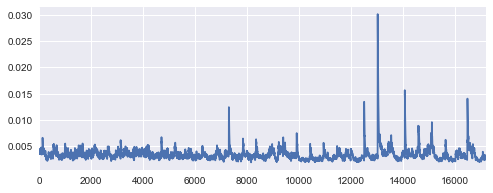

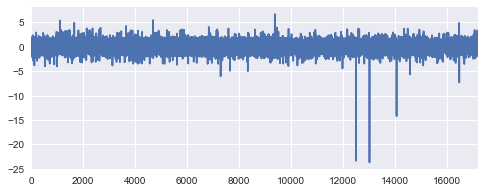

In [8]:
plt.figure(figsize=(8,3))
resFit1['ENEL'].plot()
plt.figure(figsize=(8,3))
sigmaFit1['ENEL'].plot()
normRes = resFit1['ENEL'] / sigmaFit1['ENEL']
plt.figure(figsize=(8,3))
normRes.plot()

In [16]:
normRes = resFit1 / sigmaFit1

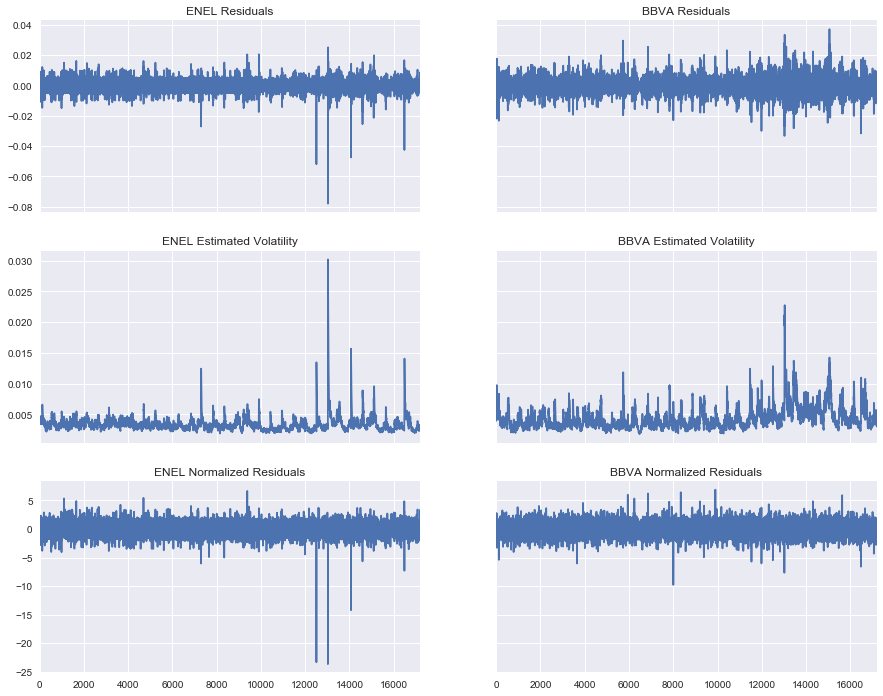

In [23]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')
resFit1['ENEL'].plot(ax=ax1)
ax1.set_title('ENEL Residuals')

resFit1['BBVA'].plot(ax=ax2)
ax2.set_title('BBVA Residuals')

sigmaFit1['ENEL'].plot(ax=ax3)
ax3.set_title('ENEL Estimated Volatility')

sigmaFit1['BBVA'].plot(ax=ax4)
ax4.set_title('BBVA Estimated Volatility')

normRes['ENEL'].plot(ax=ax5)
ax5.set_title('ENEL Normalized Residuals')

normRes['BBVA'].plot(ax=ax6)
ax6.set_title('BBVA Normalized Residuals')

f.set_figheight(12)
f.set_figwidth(15)

plt.savefig('Mgarch_ENEL_BBVA.eps', format='eps', dpi=1000)


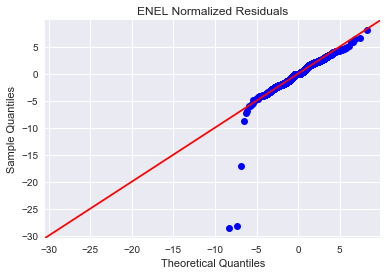

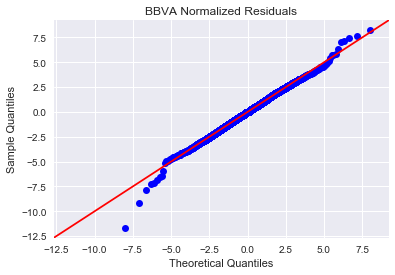

In [30]:
fig = sm.qqplot(normRes['ENEL'], stats.t, fit=True, line='45')
plt.title('ENEL Normalized Residuals')
plt.savefig('qqplotTstudENELmGarch.eps', format='eps', dpi=1000)

fig = sm.qqplot(normRes['BBVA'], stats.t, fit=True, line='45')
plt.title('BBVA Normalized Residuals')
plt.savefig('qqplotTstudBBVAmGarch.eps', format='eps', dpi=1000)

(-15, 15)

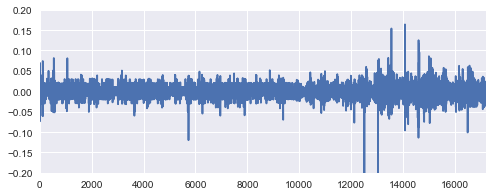

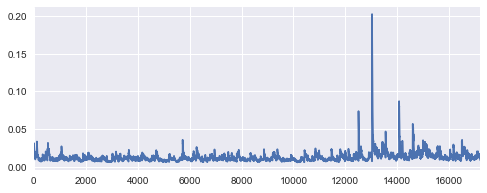

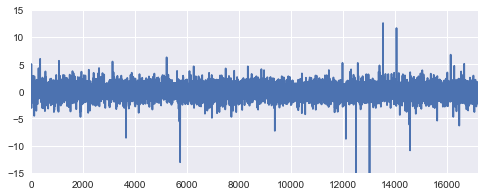

In [12]:
plt.figure(figsize=(8,3))
resFit1['UniCredit'].plot()
plt.ylim([-.2,.2])
plt.figure(figsize=(8,3))
sigmaFit1['UniCredit'].plot()
normRes = resFit1['UniCredit'] / sigmaFit1['UniCredit']
plt.figure(figsize=(8,3))
normRes.plot()
plt.ylim([-15,15])